# Segmentação de Consumidores Para Campanhas Customizadas de Marketing

A segmentação nada mais é do que a divisão de clientes e potenciais clientes em segmentos.

Esses grupos possuem características em comum, o que irá facilitar o trabalho de Marketing e Vendas, tanto na aquisição, quanto na negociação e no relacionamento com esses perfis. 
Ao segmentar clientes a forca comercial pode focar seus esforços no perfil ideal de prospect, aquele cujas dores que mais se encaixam nas soluções da empresa e que, além disso, podem gerar mais lucro para a empresa. Dessa forma, é possível direcionar campanhas e bordagens, converter e reter mais clientes. 



##  Marketing B2B x Marketing B2C

* No Marketing Business-to-Business (B2B), uma empresa pode segmentar clientes de acordo com uma ampla variedade de fatores, incluindo:

- Indústria
- Número de empregados
- Produtos comprados anteriormente na empresa
- Localização

* No Marketing Business-to-Consumer (B2C), as empresas geralmente segmentam os clientes de acordo com dados demográficos e padrões de consumo, tal como:

- Idade
- Gênero
- Estado civil
- Localização (urbana, suburbana, rural)
- Estágio da vida (sem filhos, aposentado, etc.)
- Produtos comprados
- Valor gasto
- Horário de consumo

## Objetivos
Esse projeto faz a segmentação de clientes para campanhas de marketing apropriadas. Faremos uma análise inicial,
determinaremos o número ideal de clusters e identificaremos clientes no cluster.

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyclustertend import hopkins
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carregando os dados
data = pd.read_csv('dataset.csv')

In [3]:
#Verificando as 5 primeiras linhas
data.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


In [4]:
#Verificando a quantiade de valores Nan
data.isnull().sum()

id_transacao       0
horario_pedido     0
localidade         0
nome_item          0
quantidade_item    0
latitude           0
longitude          0
dtype: int64

In [5]:
#Verificando os tipos das variáveis
data.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [6]:
#Verificando o formato 
data.shape

(260645, 7)

In [7]:
#Retirar as variaveis latitude e longitude e usar apenas localidade. Retirar tb a coluna horario_pedido
data.drop(columns=['latitude','longitude'], axis=1, inplace= True)


In [8]:
data.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2
3,0x12b47f,2019-09-04 12:36:00,3,salada,1
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1


In [9]:
#verificando os tipos de itens pedidos e a quantidade
data['nome_item'].value_counts()

sobremesa    100000
pizza         76122
bebida        46156
salada        38367
Name: nome_item, dtype: int64

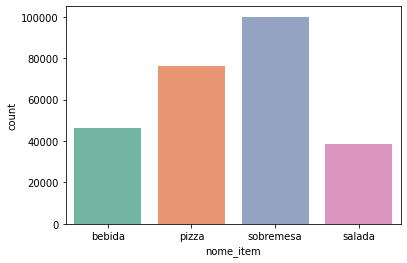

In [10]:
sns.countplot(data['nome_item'], data=data, palette="Set2")

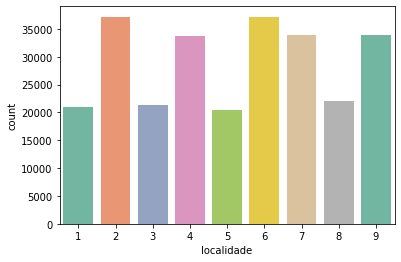

In [11]:
sns.countplot(data['localidade'], data=data, palette="Set2")

In [12]:
%%time


#Como tem ids do mesmo pedido, vamos transformar a coluna item em 4 colunas diferentes
# Lista para receber o total de pedidos
total_pedidos = []

# Extraímos cada id e cada grupo do 'group by' por id_transacao
for k, group in data.groupby('id_transacao'):
    
    # Extraímos cada id e cada grupo do group by por horario_pedido
    for m, n in group.groupby('horario_pedido'):
        
        # Extraímos cada item de cada grupo
        id_transacao = k
        horario_pedido = m
        localidade = n['localidade'].values.tolist()[0]
        bebida = 0
        pizza = 0
        sobremesa = 0
        salada = 0
        n = n.reset_index(drop = True)
        
        # E então contabilizamos os itens pedidos
        for i in range(len(n)):
            item = n.loc[i, 'nome_item']
            num = n.loc[i, 'quantidade_item']
            
            if item == 'bebida':
                bebida = bebida + num
            
            elif item == 'pizza':
                pizza = pizza + num
            
            elif item == 'sobremesa':
                sobremesa = sobremesa + num
            
            elif item == 'salada':
                salada = salada + num
        
        output = [id_transacao, horario_pedido, localidade, bebida, pizza, sobremesa, salada]
        total_pedidos.append(output)
        
print("\nAgrupamento concluído!")


Agrupamento concluído!
CPU times: user 1min 24s, sys: 59.2 ms, total: 1min 24s
Wall time: 1min 24s


In [13]:
# Convertemos a lista para dataframe
data_itens = pd.DataFrame(total_pedidos)

In [14]:
data_itens.head()

,0,1,2,3,4,5,6
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0


In [15]:
# Ajustamos os nomes das colunas
data_itens.columns = ['id_transacao', 'horario_pedido', 'local', 'bebida', 'pizza', 'sobremesa', 'salada']

In [16]:
#Colocando o index por transação
data_itens.index
data_itens = data_itens.reset_index()

In [17]:
data_itens.head()

,index,id_transacao,horario_pedido,local,bebida,pizza,sobremesa,salada
0,0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0


In [18]:
#Verificando valores Nan
data_itens.isnull().sum()

index             0
id_transacao      0
horario_pedido    0
local             0
bebida            0
pizza             0
sobremesa         0
salada            0
dtype: int64

In [19]:
#Transformando a coluna horario_pedido em datetime
data_itens['horario_pedido'] = pd.to_datetime(data_itens['horario_pedido'], format='%Y-%m-%d %H:%M')

In [20]:
data_itens.dtypes

index                      int64
id_transacao              object
horario_pedido    datetime64[ns]
local                      int64
bebida                     int64
pizza                      int64
sobremesa                  int64
salada                     int64
dtype: object

In [21]:
#Introduzindo colunas individuais para dia,mes,dia da semana e hora
data_itens['dia'] = data_itens['horario_pedido'].dt.day
data_itens['mes'] = data_itens['horario_pedido'].dt.month
data_itens['dia_semana'] = data_itens['horario_pedido'].dt.dayofweek
data_itens['hora'] = data_itens['horario_pedido'].dt.hour

In [22]:
data_itens.head()

,index,id_transacao,horario_pedido,local,bebida,pizza,sobremesa,salada,dia,mes,dia_semana,hora
0,0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0,29,1,1,0
1,1,0x100058,2019-05-05 00:08:00,6,0,2,2,0,5,5,6,0
2,2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1,28,1,0,19
3,3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0,23,2,5,0
4,4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0,30,6,6,17


In [23]:
#Retirar as colunas id_transacao e horario_pedido
data_itens.drop(columns=['id_transacao','horario_pedido'], axis=1, inplace= True)

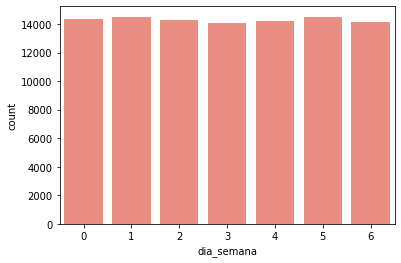

In [24]:
#Verificando os pedidos por dias da semana
sns.countplot(x= 'dia_semana', data= data_itens, color="salmon")

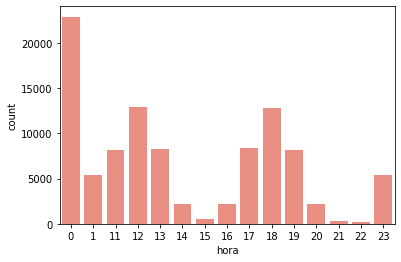

In [25]:
#Verificando o padrão por hora
sns.countplot(x= 'hora', data= data_itens, color="salmon")

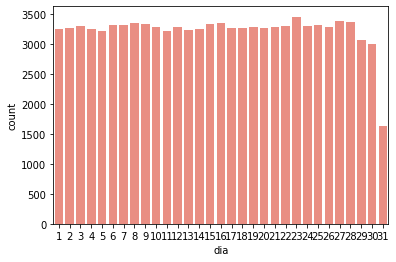

In [26]:
#Verificando o padrão por dia
sns.countplot(x= 'dia', data= data_itens, color="salmon")

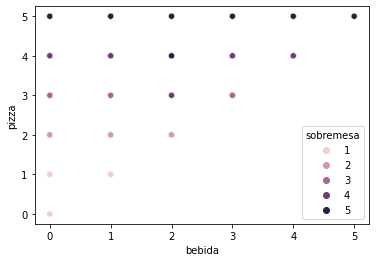

In [27]:
#verificando o padrão entre pedidos de bebida, pizza e sobremesa
sns.scatterplot(x="bebida", y = "pizza",hue="sobremesa",data=data_itens)

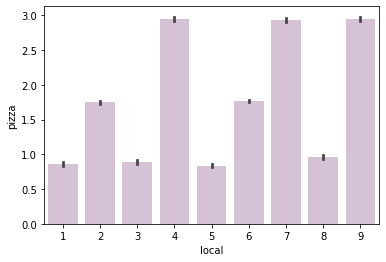

In [28]:
#Verificando a relação entre o local e a quantidade de pizzas pedidas
sns.barplot(x= 'local' , y= 'pizza',color = "thistle", data=data_itens)

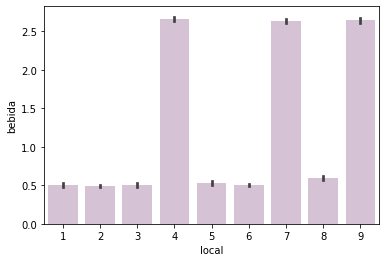

In [29]:
#Verificando a relação entre o local e a quantidade de bebidas pedidas
sns.barplot(x= 'local' , y= 'bebida',color = "thistle",data=data_itens)

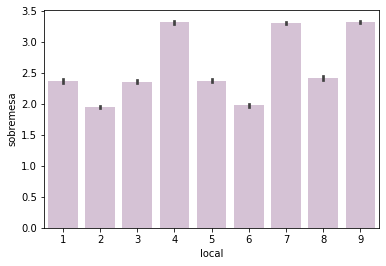

In [30]:
#Verificando a relação entre o local e a quantidade de sobremesas pedidas
sns.barplot(x= 'local' , y= 'sobremesa',color = "thistle",data=data_itens)

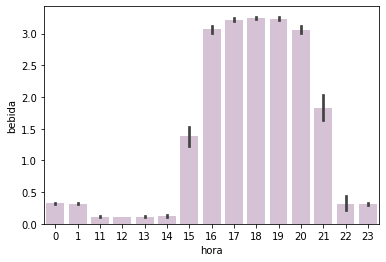

In [31]:
#Verificando a relação entre o horário e a quantidade de bebidas pedidas
sns.barplot(x= 'hora' , y= 'bebida',color = "thistle",data=data_itens)

In [32]:
#Retirando a coluna index
data_itens.drop('index', axis=1, inplace=True)

In [33]:
#Aplicando a padronização
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_itens)  

In [34]:
#Verificando se os dados são clusterizaveis
hopkins(data_scaled,100000)

0.09077028651056475

O valor Hopkins é uma maneira de medir se os dados são clusterizáveis. Valores próximos de 1 indicam que os dados são altamente clusterizáveis. Valores próximos a 0.5 indica que os dados são randômicos e valores próximos a zero são aqueles mais uniformemente distribuidos. Os dados tem que estar "longe" do 0.5.

## Modelo 1-  Modelo Kmeans

In [35]:
# Vou pegar apenas 1% dos dados para não comprometer processamento
amostra1, amostra2 = train_test_split(data_scaled, train_size = .4)

In [36]:
amostra1.shape

(40000, 9)

In [37]:
# Determinando um range de K
k_range = range(1,15)

In [38]:
# Aplicando o modelo K-Means para cada valor de K 
k_means_var = [KMeans(n_clusters = k).fit(amostra1) for k in k_range]

In [39]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [40]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(amostra1, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [41]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [42]:
# Soma total dos quadrados
soma_total = sum(pdist(amostra1)**2)/amostra1.shape[0]

In [43]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

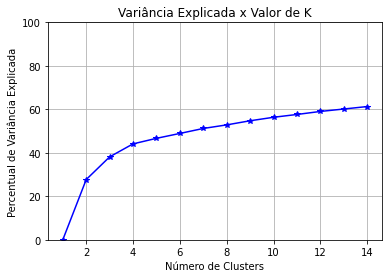

In [44]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

A curva de Elbow nos mostra o valor aproximado de k que será o ideal para o problema em questão

In [45]:
# Criando um modelo com K = 4
modelo_v1 = KMeans(n_clusters = 4)
modelo_v1.fit(amostra1)

KMeans(n_clusters=4)

In [46]:
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(amostra1, labels, metric = 'euclidean')

0.216800942892846

In [47]:
#Redução da Dimensionalidade
pca = PCA (n_components = 4).fit(amostra1)

#Transformar os dados no novo espaço
pca_trans = pca.transform(amostra1)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1','pca2','pca3','pca4'])

grupos = pd.DataFrame(labels, columns = ['etiqueta'])
#concatena
kmeans_final = pd.concat([grupos,pca_trans_df], axis=1)
kmeans_final.head()

,etiqueta,pca1,pca2,pca3,pca4
0,1,-1.873728,-1.545340,-0.095809,-0.862532
1,3,-1.213252,2.970525,-0.972261,-1.319777
2,0,0.965783,0.059675,-0.376156,1.293542
3,2,1.770445,-0.086040,1.324201,-0.559989
4,0,-1.300823,0.482477,0.269391,1.581343


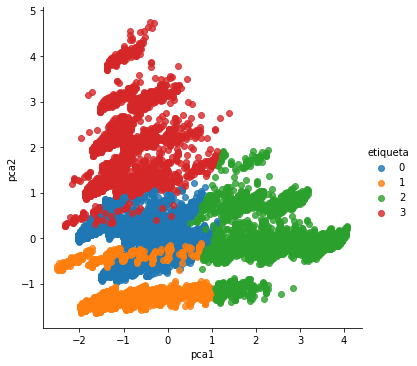

In [48]:
sns.lmplot(x='pca1', y='pca2', hue='etiqueta', fit_reg=False, data=kmeans_final)

## Modelo 2 - Kmeans sem as datas

In [49]:
#Retirando as colunas que representam a variável tempo
data_clean = data_itens.drop(columns=['dia','mes','dia_semana','hora'])

In [50]:
#Realizando a padronização
scaler = StandardScaler()
data_clean_scaled = scaler.fit_transform(data_clean)  

In [51]:
# Vou pegar apenas 1% dos dados para não comprometero processamento
amostra1b, amostra2b = train_test_split(data_clean_scaled, train_size = .4)

In [52]:
# Determinando um range de K
k_range = range(1,10)

In [53]:
# Aplicando o modelo K-Means para cada valor de K 
k_means_var = [KMeans(n_clusters = k).fit(amostra1b) for k in k_range]

In [54]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [55]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(amostra1b, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [56]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [57]:
# Soma total dos quadrados
soma_total = sum(pdist(amostra1b)**2)/amostra1.shape[0]

In [58]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

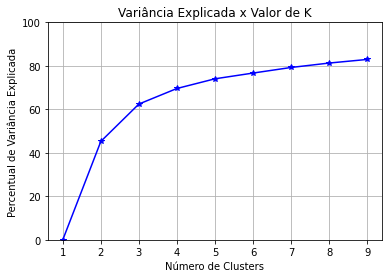

In [59]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [60]:
# Criando um modelo com K = 4


modelo_v2 = KMeans(n_clusters = 4,
                      init = 'k-means++', 
                      n_init = 10 ,
                      max_iter = 300, 
                      tol = 0.0001,  
                      random_state = 111  , 
                      algorithm = 'elkan')
modelo_v2.fit(amostra1b)

KMeans(algorithm='elkan', n_clusters=4, random_state=111)

In [61]:
# Silhouette Score
labels2 = modelo_v2.labels_
silhouette_score(amostra1b, labels2, metric = 'euclidean')

0.39040209787604885

Podemos notar que a silhouette_score aumentou o valor (quanto maior, melhor)

In [62]:
#Redução da Dimensionalidade
pca = PCA (n_components = 2).fit(amostra1b)

#Transformar os dados no novo espaço
pca_trans = pca.transform(amostra1b)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1','pca2'])

grupos2 = pd.DataFrame(labels2, columns = ['etiqueta'])
#concatena
kmeans_final = pd.concat([grupos2,pca_trans_df], axis=1)
kmeans_final.head()

,etiqueta,pca1,pca2
0,2,3.204483,0.151365
1,2,2.434532,0.084514
2,3,-0.724605,2.405325
3,3,-1.797073,3.024780
4,2,2.324245,-0.112397


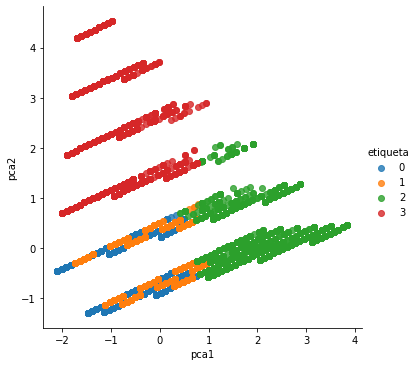

In [63]:
sns.lmplot(x='pca1', y='pca2', hue='etiqueta', fit_reg=False, data=kmeans_final)

## Modelo 3 - Kmeans sem as datas e com k=3

In [64]:
# Criando um modelo com K = 3


modelo_v3 = KMeans(n_clusters = 3,
                      init = 'k-means++', 
                      n_init = 10 ,
                      max_iter = 300, 
                      tol = 0.0001,  
                      random_state = 111  , 
                      algorithm = 'elkan')
modelo_v3.fit(amostra1b)

KMeans(algorithm='elkan', n_clusters=3, random_state=111)

In [65]:
# Silhouette Score
labels3 = modelo_v3.labels_
silhouette_score(amostra1b, labels3, metric = 'euclidean')

0.4207782371906489

In [66]:
#Redução da Dimensionalidade
pca = PCA (n_components = 2).fit(amostra1b)

#Transformar os dados no novo espaço
pca_trans = pca.transform(amostra1b)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1','pca2'])

grupos3 = pd.DataFrame(labels3, columns = ['etiqueta'])
#concatena
kmeans_final = pd.concat([grupos3,pca_trans_df], axis=1)
kmeans_final.head()

,etiqueta,pca1,pca2
0,1,3.204483,0.151365
1,1,2.434532,0.084514
2,0,-0.724605,2.405325
3,0,-1.797073,3.024780
4,1,2.324245,-0.112397


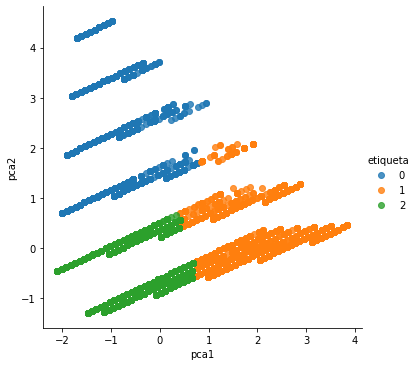

In [67]:
sns.lmplot(x='pca1', y='pca2', hue='etiqueta', fit_reg=False, data=kmeans_final)

Esse modelo com um valor de k=3 obteve uma resposta melhor, com um valor de silhouette_score mais alto.

## Modelo 4 - BDSCAN

In [101]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=8).fit(amostra1b)
    

In [102]:
labels4 = clustering.labels_

In [103]:
# Reduzindo a Dimensionalidade
pca = PCA(n_components = 2).fit(amostra1b)

In [104]:
# Fit
pca_2d = pca.transform(amostra1b)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1','pca2'])
grupos4 = pd.DataFrame(labels4, columns = ['etiqueta'])
#concatena
kmeans_final4 = pd.concat([grupos4,pca_trans_df], axis=1)
kmeans_final4.head()

,etiqueta,pca1,pca2
0,0,3.204483,0.151365
1,0,2.434532,0.084514
2,1,-0.724605,2.405325
3,2,-1.797073,3.024780
4,0,2.324245,-0.112397


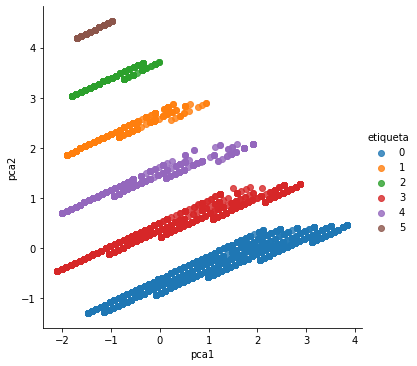

In [105]:
sns.lmplot(x='pca1', y='pca2', hue='etiqueta', fit_reg=False, data=kmeans_final4)

In [106]:
# Silhouette Score
labels4 = clustering.labels_
silhouette_score(amostra1b, labels4, metric = 'euclidean')

0.09710415662464864

## Modelo 5 -  Mean Shift

In [118]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# Cria o modelo

# bandwidth = Comprimento da Interação entre os exemplos, também conhecido como a largura de banda do algoritmo.
bandwidth = estimate_bandwidth(amostra1b, quantile = .15, n_samples = 500)

# Cria o modelo
modelo_v5 = MeanShift(bandwidth=bandwidth )

# Treina o modelo
modelo_v5.fit(amostra1b)

MeanShift(bandwidth=1.5478163000503011)

In [120]:
# Coleta os labels, centróides e número de clusters
labels5 = modelo_v5.labels_


In [121]:
# Fit
pca_2d = pca.transform(amostra1b)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1','pca2'])
grupos5 = pd.DataFrame(labels5, columns = ['etiqueta'])
#concatena
kmeans_final5 = pd.concat([grupos5,pca_trans_df], axis=1)
kmeans_final5.head()

,etiqueta,pca1,pca2
0,1,3.204483,0.151365
1,1,2.434532,0.084514
2,3,-0.724605,2.405325
3,3,-1.797073,3.024780
4,1,2.324245,-0.112397


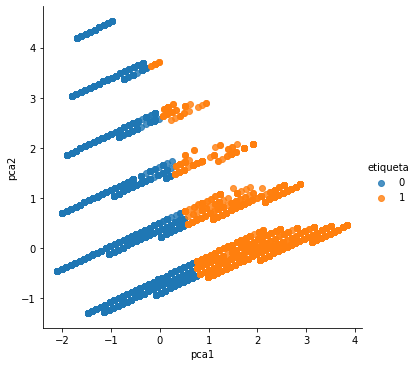

In [116]:
sns.lmplot(x='pca1', y='pca2', hue='etiqueta', fit_reg=False, data=kmeans_final5)

In [ ]:
# Silhouette Score
labels5 = clustering.labels_
silhouette_score(amostra1b, labels5, metric = 'euclidean')

o modelo Kmeans foi aquele que resultou em uma melhor segmentação. Continuamos trabalhando para melhorá-lo ainda
mais.